<a href="https://colab.research.google.com/github/choiws777/test/blob/master/CNA6_day3_3_unsupervised_creditcard_WS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신용카드 거래사기 탐지

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv의 사본')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


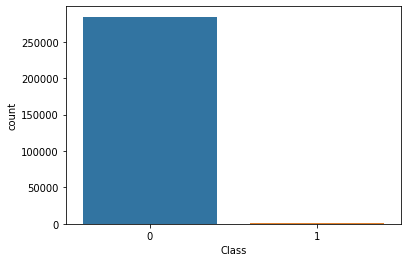

In [ ]:
# Target Class 분포
sns.countplot(x='Class', data=df);

In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

X.shape, Y.shape

((284807, 30), (284807,))

In [ ]:
# 피처 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.loc[:, X.columns] = scaler.fit_transform(X[X.columns])

X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.050379e-14,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,2.026926e-17,1.622758e-15,2.052953e-15,-8.310622e-17,-8.845502e-16,-1.789241e-15,-1.542079e-16,8.046919e-16,-2.547965e-16,-4.550555e-16,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,-4.700128e+00,-1.869868e+01,-5.819392e+00,-2.004428e+01,-4.915191e+00,-1.612534e+01,-2.962645e+01,-1.133266e+01,-8.861402e+00,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,-7.470224e-01,-4.058964e-01,-6.516198e-01,-4.439565e-01,-6.368132e-01,-5.341353e-01,-5.695609e-01,-5.951621e-01,-5.605369e-01,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,-3.209268e-02,1.401448e-01,-1.363250e-02,5.278702e-02,5.251917e-02,7.579255e-02,-7.732604e-02,-4.338370e-03,4.588014e-03,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,7.245863e-01,6.187332e-01,6.656518e-01,5.144513e-01,7.088502e-01,5.971989e-01,4.705737e-01,5.974968e-01,5.637928e-01,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,1.177504e+01,7.854679e+00,7.160735e+00,1.098147e+01,9.699117e+00,1.976044e+01,1.089502e+01,6.014342e+00,6.869414e+00,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [ ]:
# 데이터 분리
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    stratify=Y, 
                                                    random_state=2021)
X_train.shape, y_train.shape

((199364, 30), (199364,))

# 군집 분석

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

### k-Means

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=5)
kmeans.fit(X_train)   

KMeans(n_clusters=5)

In [ ]:
clusters = kmeans.labels_  
clusters

array([1, 2, 1, ..., 2, 2, 1], dtype=int32)

In [ ]:
# 클래스 레이블과 비교
df_cluster = pd.DataFrame()
df_cluster['Class'] = y_train
df_cluster['Cluster'] = clusters
df_cluster

,Class,Cluster
224717,0,1
216687,0,2
259613,0,1
241557,0,1
32839,0,2
...,...,...
61508,0,2
232786,0,1
72000,0,2
79914,0,2


In [ ]:
df_cluster['Class'].value_counts()
# 정상 거래 비정상 거래 비교,  1이 비정상

0    199020
1       344
Name: Class, dtype: int64

In [ ]:
df_cluster['Cluster'].value_counts()

2    98671
1    83618
0    14021
4     2878
3      176
Name: Cluster, dtype: int64

### 군집 분석 결과와 실제 클래스 비교

In [ ]:
df_cluster.loc[df_cluster['Cluster']==4, 'Class'].value_counts()

0    2872
1       6
Name: Class, dtype: int64

In [ ]:
df_cluster.loc[df_cluster['Cluster']==3, 'Class'].value_counts()

1    152
0     24
Name: Class, dtype: int64

In [ ]:
df_cluster.loc[df_cluster['Cluster']==2, 'Class'].value_counts()

0    98601
1       70
Name: Class, dtype: int64

In [ ]:
df_cluster.loc[df_cluster['Cluster']==1, 'Class'].value_counts()

0    83532
1       86
Name: Class, dtype: int64

In [ ]:
df_cluster.loc[df_cluster['Cluster']==0, 'Class'].value_counts()

0    13991
1       30
Name: Class, dtype: int64

# 주성분 분석 (PCA)

In [ ]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
224717,1.034305,-0.171481,0.292348,-1.291464,-0.594819,2.509676,2.474780,1.229704,0.514406,-1.018309,-0.410955,-0.277587,-0.256987,-0.446773,1.011496,0.091578,-0.541429,-0.783530,-0.369833,-0.892105,0.205482,0.466885,0.895125,0.196011,1.126437,-0.187600,-1.267268,0.382243,0.641222,0.222495
216687,0.963908,-0.646197,-0.288262,1.256260,-1.753057,-0.015516,0.191675,0.679110,-0.296878,-0.037723,0.841870,0.653302,-1.441807,-2.326490,-0.893136,-1.383451,1.278010,-0.331658,-1.415264,0.745685,0.185656,-0.687778,-0.951128,0.203436,0.999543,0.818232,-1.297997,-0.266465,-1.842608,-0.001398
259613,1.355775,1.026926,0.054635,-1.063730,0.238524,0.289788,-0.434342,0.046235,-0.052908,0.229228,-0.194506,1.279232,0.805058,-0.263113,-0.616011,-0.478890,0.469990,0.418858,0.078450,0.251594,-0.221949,-0.405661,-1.091838,0.574954,0.998266,-0.640541,0.308977,-0.159469,-0.120894,-0.348072
241557,1.184764,-0.375008,-0.461349,0.511589,-0.247657,1.323522,-0.692566,-0.048089,0.016576,0.155748,-0.116250,0.598059,0.625643,-0.564744,0.133685,-1.205606,0.228302,-0.973846,-0.172854,0.288093,0.250776,-0.316302,-1.215054,0.963173,1.143363,-3.173784,-1.113847,0.044757,0.206122,-0.341275
32839,-1.217714,0.591882,-0.947099,0.411739,-0.764738,-1.348348,-0.337431,-0.770491,-0.048177,-1.586025,1.268696,1.078369,0.231483,0.404906,-0.475720,-1.402702,-0.779824,0.849004,0.002234,0.424627,-0.065936,-0.402738,-0.912750,-0.005029,0.850893,0.431100,-0.781521,0.042554,0.119719,0.263275


In [ ]:
from sklearn.decomposition import PCA
# 차원을 9개의 변수?차원? 으로 지정한것임 이건 
pca = PCA(n_components=9, random_state=2021)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8
224717,0.352923,1.825717,0.070662,0.149183,-0.527195,-0.562427,-0.296411,-0.917351,-1.753666
216687,-0.094816,0.127534,1.183896,-1.295347,-0.682898,1.574471,2.122413,0.056448,0.876331
259613,-0.555061,1.526898,0.182957,-0.002390,0.081205,0.173747,0.155814,0.361314,-0.726453
241557,-0.477615,1.815618,-0.051271,-1.121163,0.039318,0.030175,0.404813,0.755003,0.029707
32839,0.430751,-1.348039,0.056367,-0.649525,0.701570,-0.339578,2.378723,0.465543,-1.236058


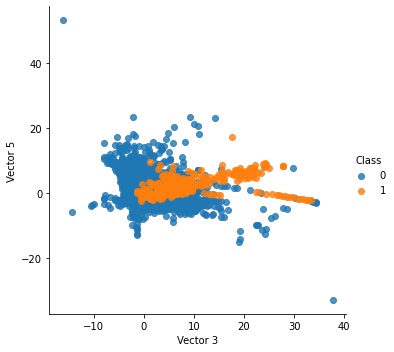

In [ ]:
# 2개의 주성분으로 클래스 구분한 결과를 시각화
def plot_scatter(dfx, dfy, col1=0, col2=1):
    temp = pd.DataFrame(data=dfx.loc[:,[col1, col2]], index=dfx.index)
    temp = pd.concat((temp,dfy), axis=1, join="inner")
    temp.columns = [f"Vector {col1}", f"Vector {col2}", "Class"]
    sns.lmplot(x=f"Vector {col1}", y=f"Vector {col2}", hue="Class", 
               data=temp, fit_reg=False)
    
plot_scatter(X_train_pca, y_train, 3, 5)

## 이상 탐지

In [ ]:
# 원본 데이터를 재구성
X_train_inverse_pca = pca.inverse_transform(X_train_pca)
X_train_inverse_pca = pd.DataFrame(data=X_train_inverse_pca, index=X_train.index)
X_train_inverse_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
224717,1.278694,0.886078,-0.147772,-1.128194,0.376150,0.176824,0.879054,-0.096799,0.370019,-0.658725,0.052752,-0.667422,0.512629,-0.205670,-0.029161,-0.011682,-0.299829,-0.446295,0.486079,-0.624078,0.172485,0.266874,0.042458,0.741222,0.627161,-0.120725,-0.175521,0.099927,-0.012334,0.290034
216687,0.086405,-0.262487,-0.029049,0.341177,-0.821993,0.063149,-0.147910,0.250612,-0.972508,0.406129,0.856586,0.358228,-0.891031,-0.044891,-0.110783,-1.436699,-0.444871,0.010734,-0.327775,0.597189,0.585720,-0.948188,0.157917,0.192300,0.052372,-0.048570,-0.086015,-0.959224,-1.620691,-0.046687
259613,1.095682,0.486240,-0.028362,-0.665156,-0.003479,0.414637,-0.051655,-0.244767,-0.050724,-0.187527,0.171944,-0.155170,0.306579,0.013415,-0.290470,-0.473048,0.052831,-0.024115,-0.137114,-0.260852,-0.205241,-0.064727,0.464573,0.172159,0.280444,-0.378846,-0.203513,0.019178,-0.137751,-0.350725
241557,1.297067,0.570901,-0.197728,-0.191800,-0.576460,0.516469,-0.522684,0.287287,-0.448932,0.299305,0.271151,-0.166761,0.400948,0.053373,-0.190199,-0.865397,-0.067291,0.083342,0.125959,-0.058182,-0.054376,-0.025817,0.480830,0.186193,-0.026748,-0.591414,-0.490935,0.259480,-0.330612,-0.281697
32839,-0.962939,0.169043,-0.505997,0.860910,0.034405,-0.620613,0.598742,-0.153107,0.307729,-0.296148,0.790231,0.720979,0.027731,0.395186,-0.037478,-1.508132,-0.739337,0.897927,-0.182314,-0.319852,0.188134,-0.970797,0.015593,-0.272276,0.815672,0.430528,-0.690713,0.090331,0.076178,0.277851


In [ ]:
# 원본 데이터와 PCA 복원 데이터의 재구성 오차 계산

def anomaly_score(df_origin, df_recon):
    loss = np.sum((df_origin.values - df_recon.values)**2, axis=1)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

scores = anomaly_score(X_train, X_train_inverse_pca)
print(np.mean(scores))
scores

0.0017107714409176692


array([0.00162756, 0.00171874, 0.00057426, ..., 0.00138892, 0.00025865,
       0.0003105 ])

In [ ]:
df_pca = pd.DataFrame()
df_pca['Class'] = y_train
df_pca['Score'] = scores
df_pca

,Class,Score
224717,0,0.001628
216687,0,0.001719
259613,0,0.000574
241557,0,0.001576
32839,0,0.000524
...,...,...
61508,0,0.004838
232786,0,0.001267
72000,0,0.001389
79914,0,0.000259


In [ ]:
df_pca['Class'].value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [ ]:
df_pca.sort_values(by='Score', ascending=False).iloc[:350, 0].value_counts()

0    248
1    102
Name: Class, dtype: int64

## 테스트 데이터로 성능 평가

0.0005252016418513471


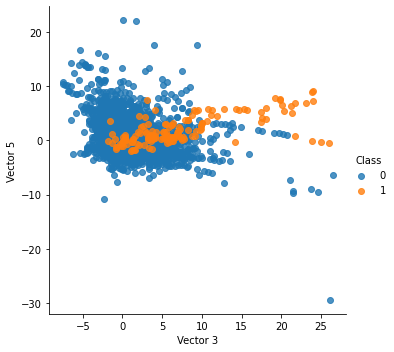

In [ ]:
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(data=X_test_pca, index=X_test.index)

X_test_inverse_pca = pca.inverse_transform(X_test_pca)
X_test_inverse_pca = pd.DataFrame(data=X_test_inverse_pca, \
                                  index=X_test.index)

scores = anomaly_score(X_test, X_test_inverse_pca)
print(np.mean(scores))

plot_scatter(X_test_pca, y_test, 3, 5)

In [ ]:
df_test_pca = pd.DataFrame()
df_test_pca['Class'] = y_test
df_test_pca['Score'] = scores
df_test_pca

,Class,Score
119747,0,0.000166
44848,0,0.000122
147344,0,0.000579
201629,0,0.000160
175463,0,0.000289
...,...,...
7212,0,0.000461
63415,0,0.000229
254004,0,0.000257
199532,0,0.000559


In [ ]:
df_test_pca['Class'].value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [ ]:
df_test_pca.sort_values(by='Score', ascending=False).iloc[:350, 0].value_counts()

0    293
1     57
Name: Class, dtype: int64